In [1]:
!git clone https://github.com/phuockhanhle/SY09_pokemon.git
%cd SY09_pokemon

Cloning into 'SY09_pokemon'...
remote: Enumerating objects: 48, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (42/42), done.
remote: Total 48 (delta 9), reused 36 (delta 4), pack-reused 0
Unpacking objects: 100% (48/48), done.
/content/SY09_pokemon


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,train_test_split

In [28]:
df = pd.read_csv("presenation/Original.csv")
from presenation.traitement import onehotencoding
from presenation.traitement import Differ
df = onehotencoding(df)
df = Differ(df)

/content/SY09_pokemon/presenation/traitement.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['dif'+str(X.columns[i])[2:]] = X.iloc[:,i] - X.iloc[:,i+6]


In [0]:
X = df.drop(columns = 'winner')
df.loc[df['winner']=='t','winner']=1
df.loc[df['winner']=='f','winner']=0
y = df['winner']

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =42)

In [35]:
cls = LogisticRegression()
cls.fit(X_train,list(y_train))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
from sklearn.metrics import f1_score

In [48]:
f1_score(list(y_test),cls.predict(X_test))

0.8835681745947663

In [0]:
from src.evaluate import evaluation

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      5247
           1       0.89      0.88      0.88      4753

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



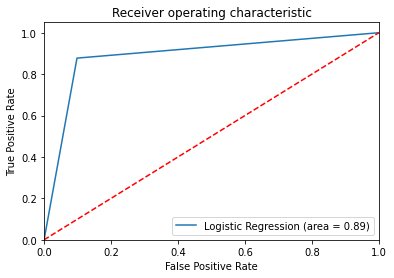

AttributeError: ignored

In [51]:
evaluation(cls.predict(X_test),list(y_test))